## Vấn đề 
_Dự đoán khả năng tiến triển của bệnh tiểu đường thông qua các chỉ số sinh lý của cơ thể._


## Thông tin dữ liệu:

- Số lượng mẫu: 442 (thông tin từ 442 bệnh nhân)
- Số lượng thuộc tính:
    Thông tin các thuộc tính (10 cột giá trị đầu tiên): Age(tuổi), Sex (giới tính), 
    Body mass index (chỉ số khối cơ thể), Average blood pressure(huyết ap trung bình), S1, S2, S3, S4, S5, S6 (sáu phép đo huyết thanh khác).
- Mục tiêu:	Cột 11, chỉ số đánh giá mức độ tiến triển của bệnh 1 năm sau khi điều trị. 

**! Chú ý: Dữ liệu thông tin thuộc tính đã được chuẩn hoá**

Xem thêm thông tin về nguồn dữ liệu tại: (https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html)


## Hướng giải quyết

Giả sử rằng khả năng tiến triển của bệnh tiểu đường (ký hiệu: `y`) là đại lượng phụ thuộc tuyến tính vào các thông tin sinh lý của bệnh nhân như các thuộc tính đã mô tả ở trên (tuổi, giới tính, chỉ số khối, ... - ký hiệu: `x1, x2, .. x_n`) : 

`y = w0 + w1*x1 + w1*x2 + ... + w_n*x_n`

Mục tiêu: Tìm được bộ trọng số `[w0, w2, ... w_n]` biểu diễn mối quan hệ này. 

## Thư viện sử dụng 

- matplotlib: phục vụ vẽ các đồ thị 
- numpy: tính toán các phép biến đổi trên ma trận / vector 
- math: thực hiện một số hàm tính toán 
- pandas: phục vụ chuyển đổi trên dữ liệu dạng bảng 
- scikit-learn: (sklearn) thư viện hỗ trợ xây dựng các mô hình học máy, các hàm training và testing. 


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import math 

from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score


## 1. Đọc dữ liệu 

Dữ liệu về bệnh tiểu đường được hỗ trợ bởi sklearn, đọc dữ liệu thông qua hàm `datasets.load_diabetes()` 

Xem thêm các bộ dữ liệu khác tại https://scikit-learn.org/stable/datasets/index.html#toy-datasets. 

Dữ liệu nhận về ở dạng object với các thành phần thuộc tính: 
- data: ma trận 2 chiều (442x10) - các thông tin bệnh nhân được chuẩn hoá về dạng số thực. 
- target: mảng các số thực (442,) - chỉ số tiến triển của bệnh tiểu đường. 

In [2]:
# lay du lieu diabetes - du lieu ve benh tieu duong
diabetes = datasets.load_diabetes()
print("Số chiều dữ liệu input: ", diabetes.data.shape)
print("Số chiều dữ liệu target: ", diabetes.target.shape)
print()

print("5 mẫu dữ liệu đầu tiên:")
print("input: ", diabetes.data[:5])
print("target: ",diabetes.target[:5])

Số chiều dữ liệu input:  (442, 10)
Số chiều dữ liệu target:  (442,)

5 mẫu dữ liệu đầu tiên:
input:  [[ 0.03807591  0.05068012  0.06169621  0.02187235 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990842 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632783 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06832974 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567061 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286377 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665645  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02269202 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187235  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03199144 -0.04664087]]
target:  [151.  75. 141. 206. 135.]


### Chia dữ liệu làm 2 phần training 362 mẫu và testing 80 mẫu 

In [3]:
# cat nho du lieu, lay 1 phan cho qua trinh thu nghiem,
# chia train test cac mau du lieu
# diabetes_X = diabetes.data[:, np.newaxis, 2]
diabetes_X = diabetes.data

diabetes_X_train = diabetes_X[:-80]
diabetes_y_train = diabetes.target[:-80]

diabetes_X_test = diabetes_X[-80:]
diabetes_y_test = diabetes.target[-80:]


## 2. Xây dựng mô hình Regression sử dụng Sklearn

Thử nghiệm xây dựng mô hình hồi quy (Linear Regression / Ridge Regression) để học được bộ tham số
- [Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) `linear_model.LinearRegression()`
- [Ridge Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge) `linear_model.Ridge()`

In [4]:
# Xay dung model su dung sklearn
regr = linear_model.LinearRegression()


In [5]:
##### exercise #####
# Yêu cầu: Cài đặt mô hình hồi quy ridge với alpha = 0.5 
# Gợi ý: xem docs Ridge Regression
######################

#regr = None 

######################

## 3. Training mô hình

Sử dụng Dữ liệu đã được chia ở bước trước đó để thực hiện training model. 

=> Tìm được bộ trọng số `[w0, w1, ... w_n]`

In [6]:
# training
regr.fit(diabetes_X_train, diabetes_y_train)
print("[w1, ... w_n] = ", regr.coef_)
print("w0 = ", regr.intercept_)

[w1, ... w_n] =  [   3.92433306 -253.94783649  520.35362721  300.43342402 -603.61603253
  325.29239155   10.80046579  139.51667826  669.06893875  111.45531856]
w0 =  152.7301323963886


In [7]:
##### exercise #####
# Yêu cầu: tính giá trị dự đoán của mô hình trên mẫu đầu tiên của tập test
# Gợi ý: sử dụng công thức y = w0 + w1*x1 + w1*x2 + ... + w_n*x_n
######################

y_pred_first = None 

######################

## 4. Dự đoán các mẫu dữ liệu trong tập test 

In [8]:
# Thuc hien suy dien sau khi training
diabetes_y_pred = regr.predict(diabetes_X_test)
pd.DataFrame(data=np.array([diabetes_y_test, diabetes_y_pred,
                            abs(diabetes_y_test - diabetes_y_pred)]).T,
             columns=["Thực tế", "Dự đoán", "Lệch"])  

,Thực tế,Dự đoán,Lệch
0,321.0,234.908470,86.091530
1,58.0,163.457251,105.457251
2,262.0,163.571593,98.428407
3,206.0,167.786647,38.213353
4,233.0,254.212487,21.212487
...,...,...,...
75,178.0,191.809673,13.809673
76,104.0,104.520901,0.520901
77,132.0,123.523369,8.476631
78,220.0,209.999198,10.000802


## 5. Đánh giá 

Sử dụng độ đo RMSE tính căn bậc 2 của trung bình bình phương lỗi. 
> $\text{RMSE}(y, \hat{y}) = \sqrt{\frac{1}{n_\text{samples}} \sum_{i=0}^{n_\text{samples} - 1} (y_i - \hat{y}_i)^2}.$

- Lỗi càng nhỏ càng thể hiện mô hình có khả năng học và dự đoán hiệu quả 
- Như thế nào là nhỏ ? 

In [9]:
math.sqrt(mean_squared_error(diabetes_y_test, diabetes_y_pred))

51.64223924042993

/Users/tungnguyen/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


,values
count,80.00000
mean,152.38750
std,78.46994
min,40.00000
25%,72.00000
50%,140.00000
75%,217.50000
max,321.00000


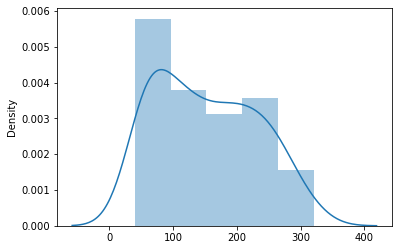

In [10]:
import seaborn as sns
sns.distplot(diabetes_y_test, )
pd.DataFrame(data=diabetes_y_test, columns=["values"]).describe()